In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

#### Lendo o arquivo CSV e exibindo os dados

In [2]:
df = pd.read_csv('winequalityN.csv')
display(df)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


####  Obtendo informações sobre o DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### Realizando uma descrição estatística dos dados

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


#### Verificando valores nulos

In [8]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### Preenchendo valores nulos com a média das respectivas colunas

In [11]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Criando histogramas para visualizar a distribuição das variáveis

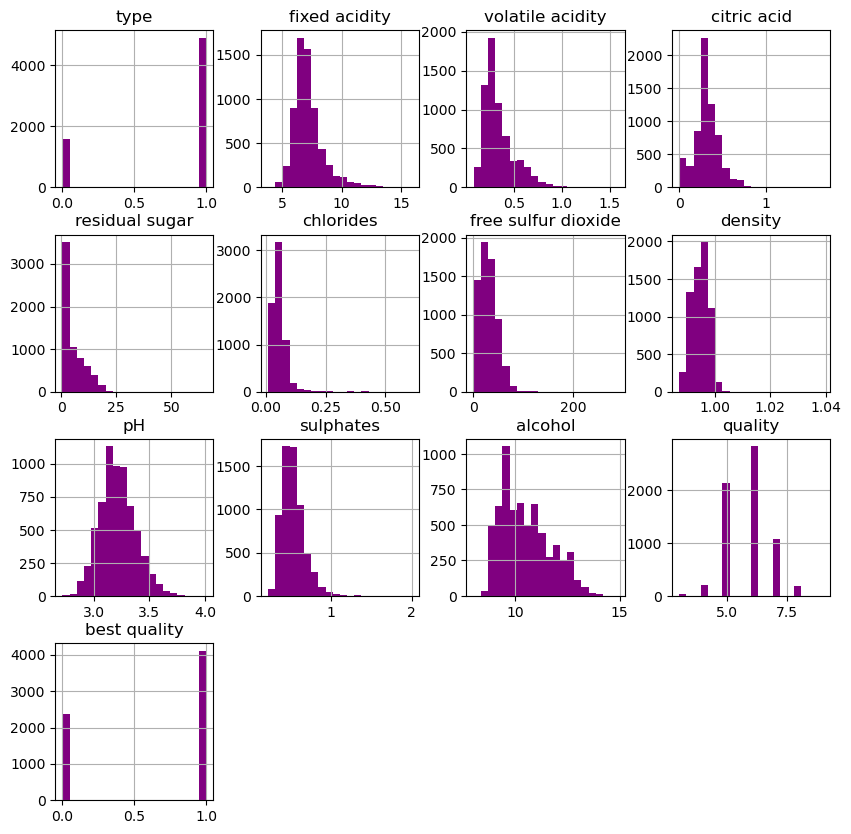

In [160]:
df.hist(bins = 20, color ='purple' ,figsize=(10,10))
plt.show()

#### Criando um gráfico de barras para a relação entre qualidade e teor de álcool

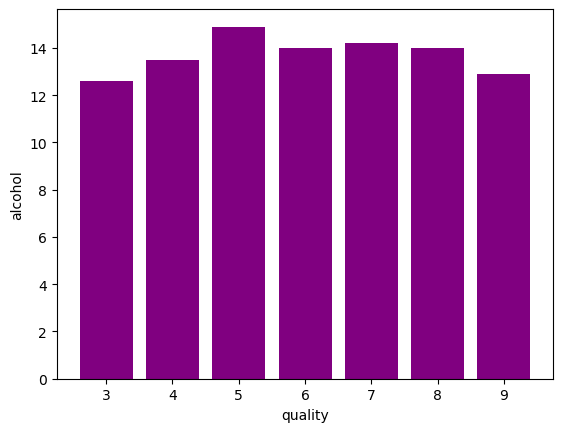

In [18]:
plt.bar(df['quality'], df['alcohol'],color= 'purple')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

#### Criando uma matriz de correlação e plotando um heatmap

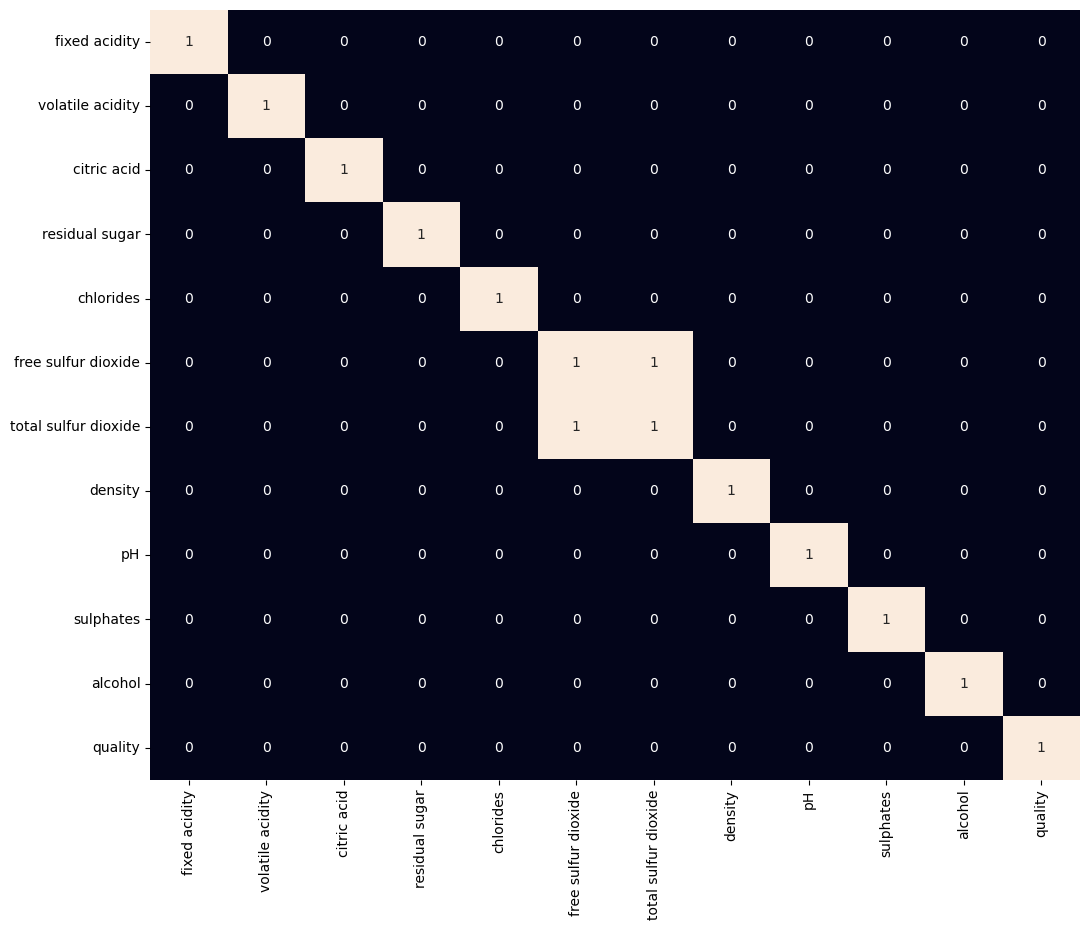

In [20]:
plt.figure(figsize =(12,10))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

#### Removendo a coluna 'total sulfur dioxide' do DataFrame, visto que existe uma alta correlação entre ela e a coluna 'free sulfur dioxide'

In [ ]:
df = df.drop('total sulfur dioxide', axis = 1)

#### Criando uma nova coluna 'best quality' com base na qualidade do vinho (1 se maior que 5, 0 caso contrário)


In [102]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

#### Substituindo os valores 'white' por 1 e 'red' por 0 na coluna 'type'


In [31]:
df.replace({'white' : 1, 'red' : 0}, inplace = True)

#### Exibindo o DataFrame atualizado


In [103]:
display(df)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1
2,1,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
4,1,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,1
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0


#### Separando as features e o target e dividindo os dados em conjunto de treinamento e teste


In [122]:
features = df.drop(['quality','best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

#### Normalizando as features usando MinMaxScaler

In [123]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

#### Definindo os modelos a serem utilizados


In [124]:
modelo = DecisionTreeClassifier(criterion = 'gini', max_depth= 7)

### Treinando os modelos e avaliando a acurácia


In [125]:
models = [LogisticRegression() , modelo , SVC(kernel='rbf'), XGBClassifier()]

for i in range(4):
    models[i].fit(xtrain, ytrain)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7019709565048414
Validation Accuracy :  0.6937888865050418

DecisionTreeClassifier(max_depth=7) : 
Training Accuracy :  0.7849480820047879
Validation Accuracy :  0.71137401538603

SVC() : 
Training Accuracy :  0.7069199304892986
Validation Accuracy :  0.695796426272719

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_para

#### Obtendo a importância das características para o modelo de árvore de decisão


In [126]:
importancias = modelo.feature_importances_
nomes_features = features.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia Treino: ", modelo.score(xtrain, ytrain))
print("Acurácia Teste: ", modelo.score(xtest, ytest))

type 0.0
fixed acidity 0.04904479812491508
volatile acidity 0.2348746409000461
citric acid 0.04405706264433988
residual sugar 0.012901687790061643
chlorides 0.02429584360199922
free sulfur dioxide 0.08741314631460621
density 0.027530880243768107
pH 0.03202785316808599
sulphates 0.06419445931556543
alcohol 0.42365962789661243
Acurácia Treino:  0.8091206465268425
Acurácia Teste:  0.7446153846153846


#### Criando a matriz de confusão para os modelos


In [139]:
from sklearn.metrics import confusion_matrix
ypred = model.predict(X_test)

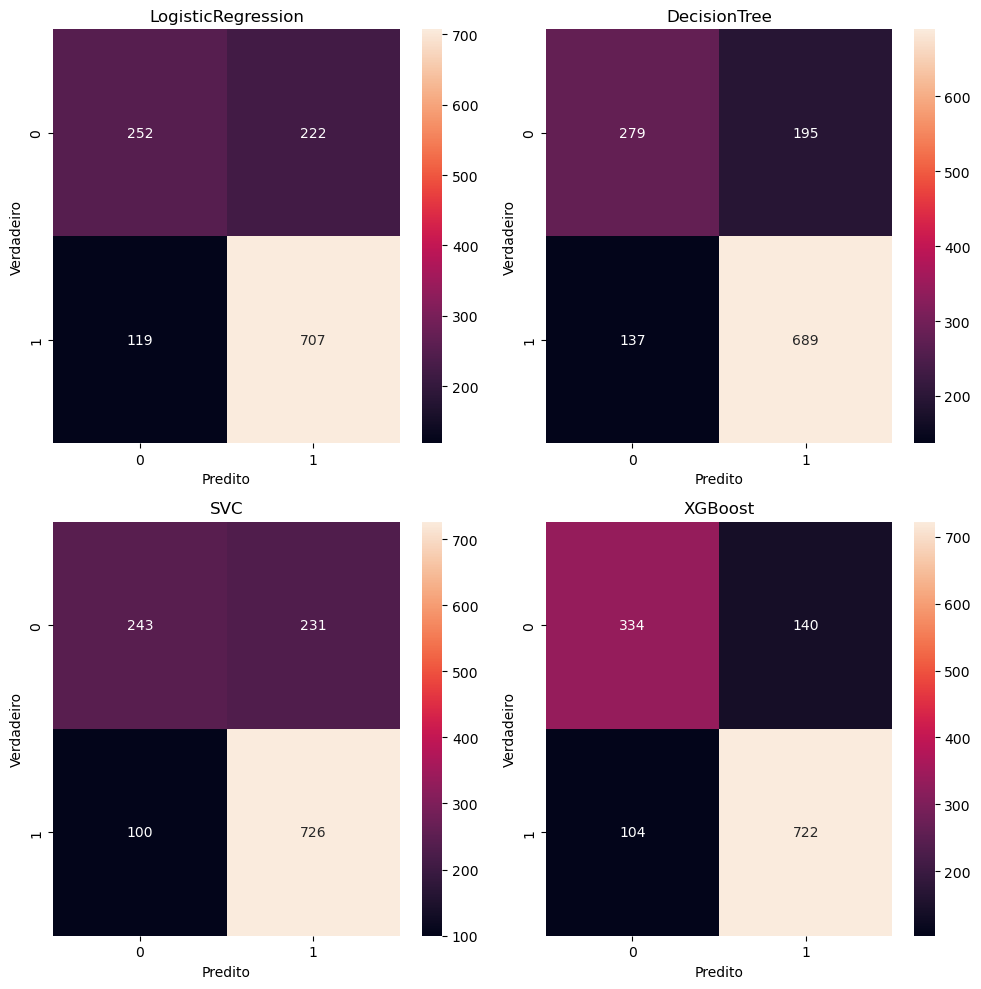

In [176]:
cm1 = confusion_matrix(ytest, models[0].predict(xtest))
cm2 = confusion_matrix(ytest, models[1].predict(xtest))
cm3 = confusion_matrix(ytest, models[2].predict(xtest))
cm4 = confusion_matrix(ytest, models[3].predict(xtest))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sb.heatmap(cm1, annot=True, fmt='g', ax=axs[0, 0])
axs[0, 0].set_title('LogisticRegression')
axs[0, 0].set_xlabel('Predito')
axs[0, 0].set_ylabel('Verdadeiro')

# Plotar a matriz 2
sb.heatmap(cm2, annot=True, fmt='g', ax=axs[0, 1])
axs[0, 1].set_title('DecisionTree')
axs[0, 1].set_xlabel('Predito')
axs[0, 1].set_ylabel('Verdadeiro')

# Plotar a matriz 3
sb.heatmap(cm3, annot=True,fmt='g', ax=axs[1, 0])
axs[1, 0].set_title('SVC')
axs[1, 0].set_xlabel('Predito')
axs[1, 0].set_ylabel('Verdadeiro')
# Plotar a matriz 4
sb.heatmap(cm4, annot=True, fmt='g', ax=axs[1, 1])
axs[1, 1].set_title('XGBoost')
axs[1, 1].set_xlabel('Predito')
axs[1, 1].set_ylabel('Verdadeiro')
# Ajustar o espaçamento entre os subplots
plt.tight_layout()
plt.show()

#### Exibindo o relatório de classificação para cada modelo


In [159]:
print('Logistic Regression \n ',metrics.classification_report(ytest,models[0].predict(xtest)))
print('Decision Tree \n ',metrics.classification_report(ytest,models[1].predict(xtest)))
print('SVC \n ',metrics.classification_report(ytest,models[2].predict(xtest)))
print('XGBOOST \n ',metrics.classification_report(ytest,models[3].predict(xtest)))

Logistic Regression 
                precision    recall  f1-score   support

           0       0.68      0.53      0.60       474
           1       0.76      0.86      0.81       826

    accuracy                           0.74      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.73      0.74      0.73      1300

Decision Tree 
                precision    recall  f1-score   support

           0       0.67      0.59      0.63       474
           1       0.78      0.83      0.81       826

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.74      0.74      0.74      1300

SVC 
                precision    recall  f1-score   support

           0       0.71      0.51      0.59       474
           1       0.76      0.88      0.81       826

    accuracy                           0.75      1300
   macro avg       0.73      0.70      0.70      1300
weighted avg       0.74    